In [ ]:
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")




In [ ]:
import pandas as pd  # Import pandas in this cell
import warnings
warnings.filterwarnings("ignore")

wine_data = pd.read_csv("/content/WineQT.csv")
# Display the first few rows of the dataset and get basic information
wine_data_info = wine_data.info()
wine_data_head = wine_data.head()

wine_data_info, wine_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  Id  
 0      9.4        5   0  
 1      9.8

In [ ]:
# Drop the 'Id' column
wine_data = wine_data.drop(columns=['Id'])

# Separate features (X) and target (y)
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Check for missing values
missing_values = wine_data.isnull().sum()

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

missing_values, X_train.shape, X_test.shape

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 (914, 11),
 (229, 11))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
sgd_model = SGDClassifier(random_state=42)
svc_model = SVC(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Predict using the test set
rf_predictions = rf_model.predict(X_test)
sgd_predictions = sgd_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)

rf_report = classification_report(y_test, rf_predictions)
sgd_report = classification_report(y_test, sgd_predictions)
svc_report = classification_report(y_test, svc_predictions)

rf_accuracy, sgd_accuracy, svc_accuracy, rf_report, sgd_report, svc_report


(0.6943231441048034,
 0.6026200873362445,
 0.6375545851528385,
 '              precision    recall  f1-score   support\n\n           4       0.00      0.00      0.00         6\n           5       0.72      0.80      0.76        96\n           6       0.67      0.66      0.66        99\n           7       0.68      0.65      0.67        26\n           8       0.00      0.00      0.00         2\n\n    accuracy                           0.69       229\n   macro avg       0.41      0.42      0.42       229\nweighted avg       0.67      0.69      0.68       229\n',
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         0\n           4       0.00      0.00      0.00         6\n           5       0.66      0.68      0.67        96\n           6       0.62      0.67      0.64        99\n           7       0.55      0.23      0.32        26\n           8       0.10      0.50      0.17         2\n\n    accuracy                           0.6

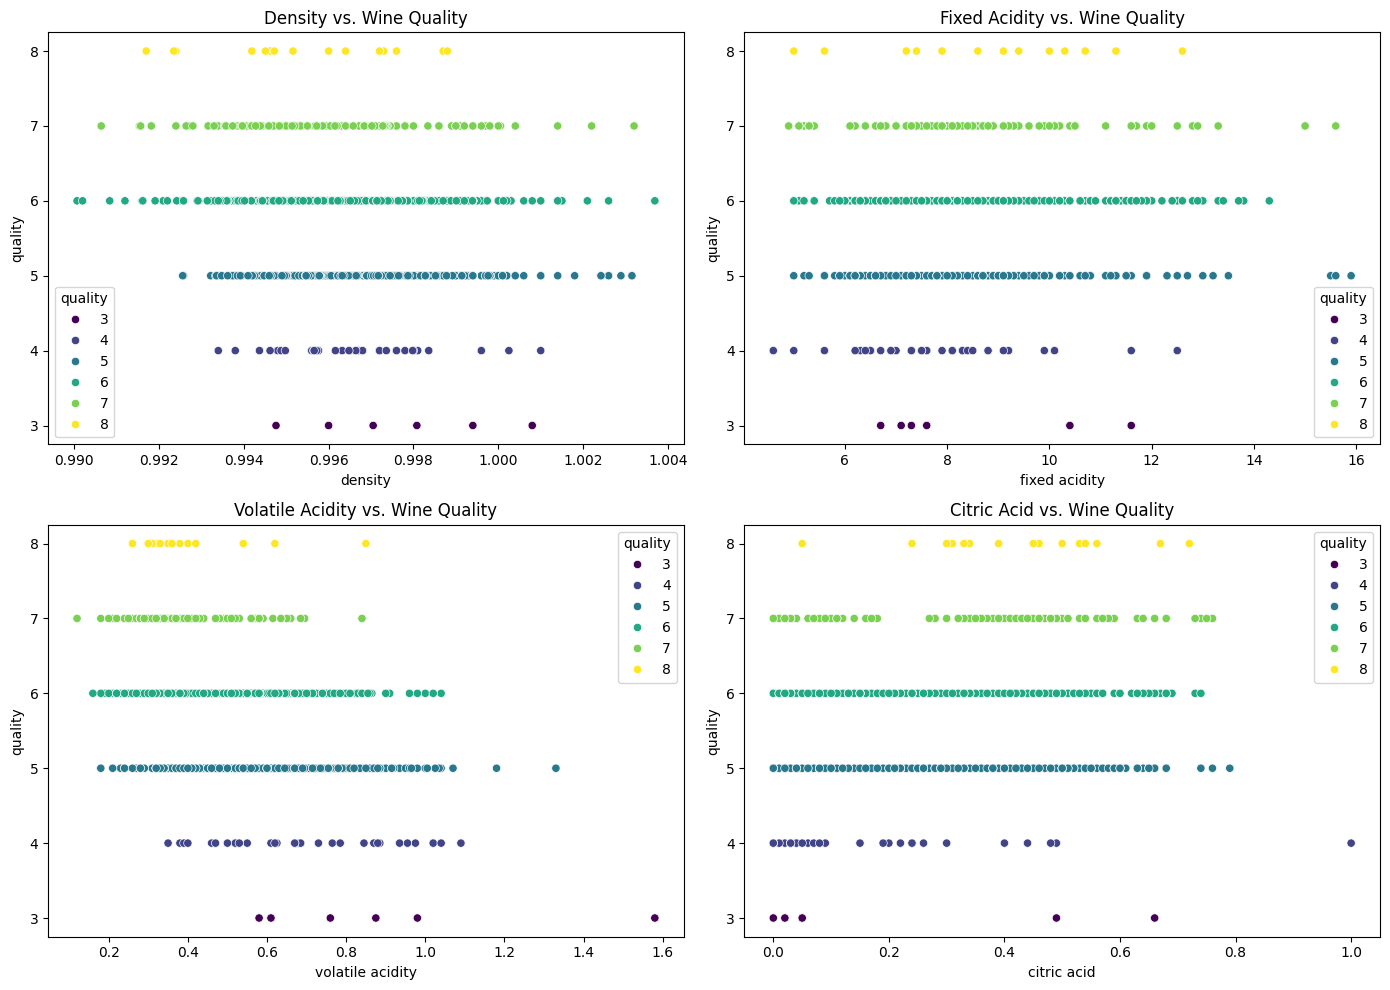

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create scatter plots for density and acidity features vs. wine quality
plt.figure(figsize=(14, 10))

# Scatter plot for density vs. quality
plt.subplot(2, 2, 1)
sns.scatterplot(x=wine_data['density'], y=wine_data['quality'], hue=wine_data['quality'], palette='viridis')
plt.title('Density vs. Wine Quality')

# Scatter plot for fixed acidity vs. quality
plt.subplot(2, 2, 2)
sns.scatterplot(x=wine_data['fixed acidity'], y=wine_data['quality'], hue=wine_data['quality'], palette='viridis')
plt.title('Fixed Acidity vs. Wine Quality')

# Scatter plot for volatile acidity vs. quality
plt.subplot(2, 2, 3)
sns.scatterplot(x=wine_data['volatile acidity'], y=wine_data['quality'], hue=wine_data['quality'], palette='viridis')
plt.title('Volatile Acidity vs. Wine Quality')

# Scatter plot for citric acid vs. quality
plt.subplot(2, 2, 4)
sns.scatterplot(x=wine_data['citric acid'], y=wine_data['quality'], hue=wine_data['quality'], palette='viridis')
plt.title('Citric Acid vs. Wine Quality')

plt.tight_layout()
plt.show()

# Calculate the correlation between these features and wine quality
correlations = wine_data[['density', 'fixed acidity', 'volatile acidity', 'citric acid', 'quality']].corr()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/WineQT.csv")

# Display the first few rows
print(df.head())

# Drop the 'Id' column
df = df.drop(columns=['Id'])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
# Filter wines with quality greater than 6
high_quality_wines = df[df['quality'] > 6]
print(high_quality_wines.head())

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
12            8.5              0.28         0.56             1.8      0.092   
27            8.1              0.38         0.28             2.1      0.066   
89            8.0              0.59         0.16             1.8      0.065   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
12                 35.0                 103.0   0.9969  3.30       0.75   
27                 13.0                  30.0   0.9968  3.23       0.73   
89                  3.0                  16.0   0.9962  3.42       0.92   

    alcohol  quality  
7      10.0        7  
8       9.5        7  
12   

In [ ]:
# Select 'density' and 'fixed acidity' columns
selected_columns = df[['density', 'fixed acidity']]
print(selected_columns.head())

   density  fixed acidity
0   0.9978            7.4
1   0.9968            7.8
2   0.9970            7.8
3   0.9980           11.2
4   0.9978            7.4


In [ ]:
# Group by 'quality' and calculate the mean
quality_means = df.groupby('quality').mean()
print(quality_means)

         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368 

In [ ]:

# Convert 'density' column to a NumPy array
density_array = df['density'].values

# Calculate the mean of the density
mean_density = np.mean(density_array)
print("Mean Density:", mean_density)

# Element-wise multiplication (e.g., scale density by 1.5)
scaled_density = density_array * 1.5
print("Scaled Density Array:", scaled_density[:10])  # Display first 10 elements

Mean Density: 0.9967304111986001
Scaled Density Array: [1.4967  1.4952  1.4955  1.497   1.4967  1.4967  1.4946  1.4919  1.4952
 1.49385]


In [ ]:
# Create a matrix from 'density' and 'fixed acidity'
matrix = df[['density', 'fixed acidity']].values

# Transpose the matrix
transpose_matrix = np.transpose(matrix)
print("Transpose of Matrix:\n", transpose_matrix)

# Calculate the dot product of the matrix with its transpose
dot_product = np.dot(matrix, transpose_matrix)
print("Dot Product:\n", dot_product)

Transpose of Matrix:
 [[0.9978  0.9968  0.997   ... 0.9949  0.99512 0.99547]
 [7.4     7.8     7.8     ... 6.2     5.9     5.9    ]]
Dot Product:
 [[55.75560484 58.71460704 58.7148066  ... 46.87271122 44.65293074
  44.65327997]
 [58.71460704 61.83361024 61.8338096  ... 49.35171632 47.01193562
  47.0122845 ]
 [58.7148066  61.8338096  61.834009   ... 49.3519153  47.01213464
  47.01248359]
 ...
 [46.87271122 49.35171632 49.3519153  ... 39.42982601 37.57004489
  37.5703931 ]
 [44.65293074 47.01193562 47.01213464 ... 37.57004489 35.80026381
  35.80061211]
 [44.65327997 47.0122845  47.01248359 ... 37.5703931  35.80061211
  35.80096052]]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/WineQT.csv")

# Drop the 'Id' column as it's not useful for analysis
df = df.drop(columns=['Id'])

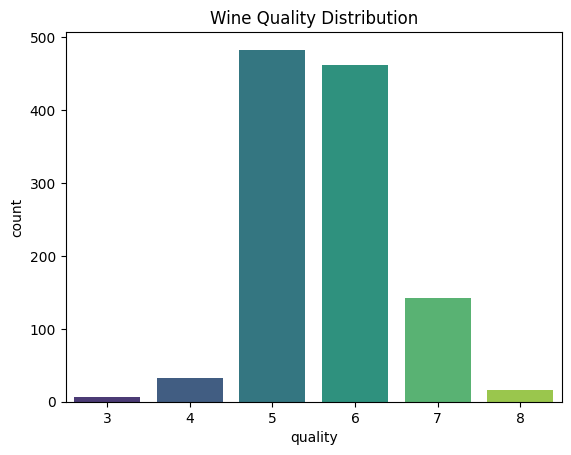

In [ ]:
# Count plot for wine quality distribution
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Wine Quality Distribution')
plt.show()

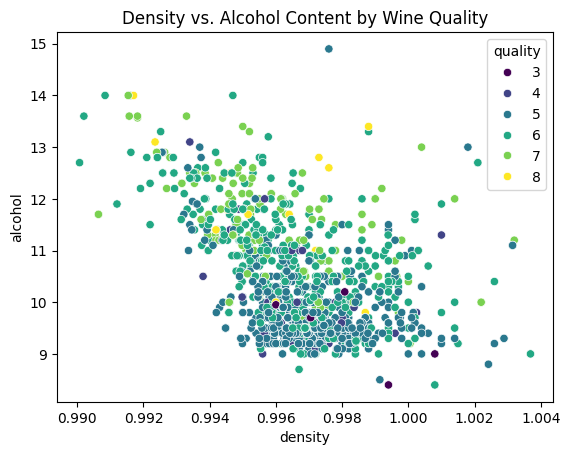

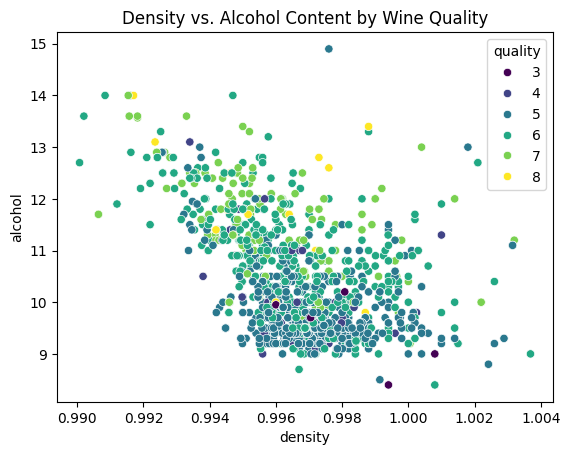

In [ ]:
# Scatter plot of density vs alcohol content colored by quality
sns.scatterplot(x='density', y='alcohol', hue='quality', data=df, palette='viridis')
plt.title('Density vs. Alcohol Content by Wine Quality')
plt.show()

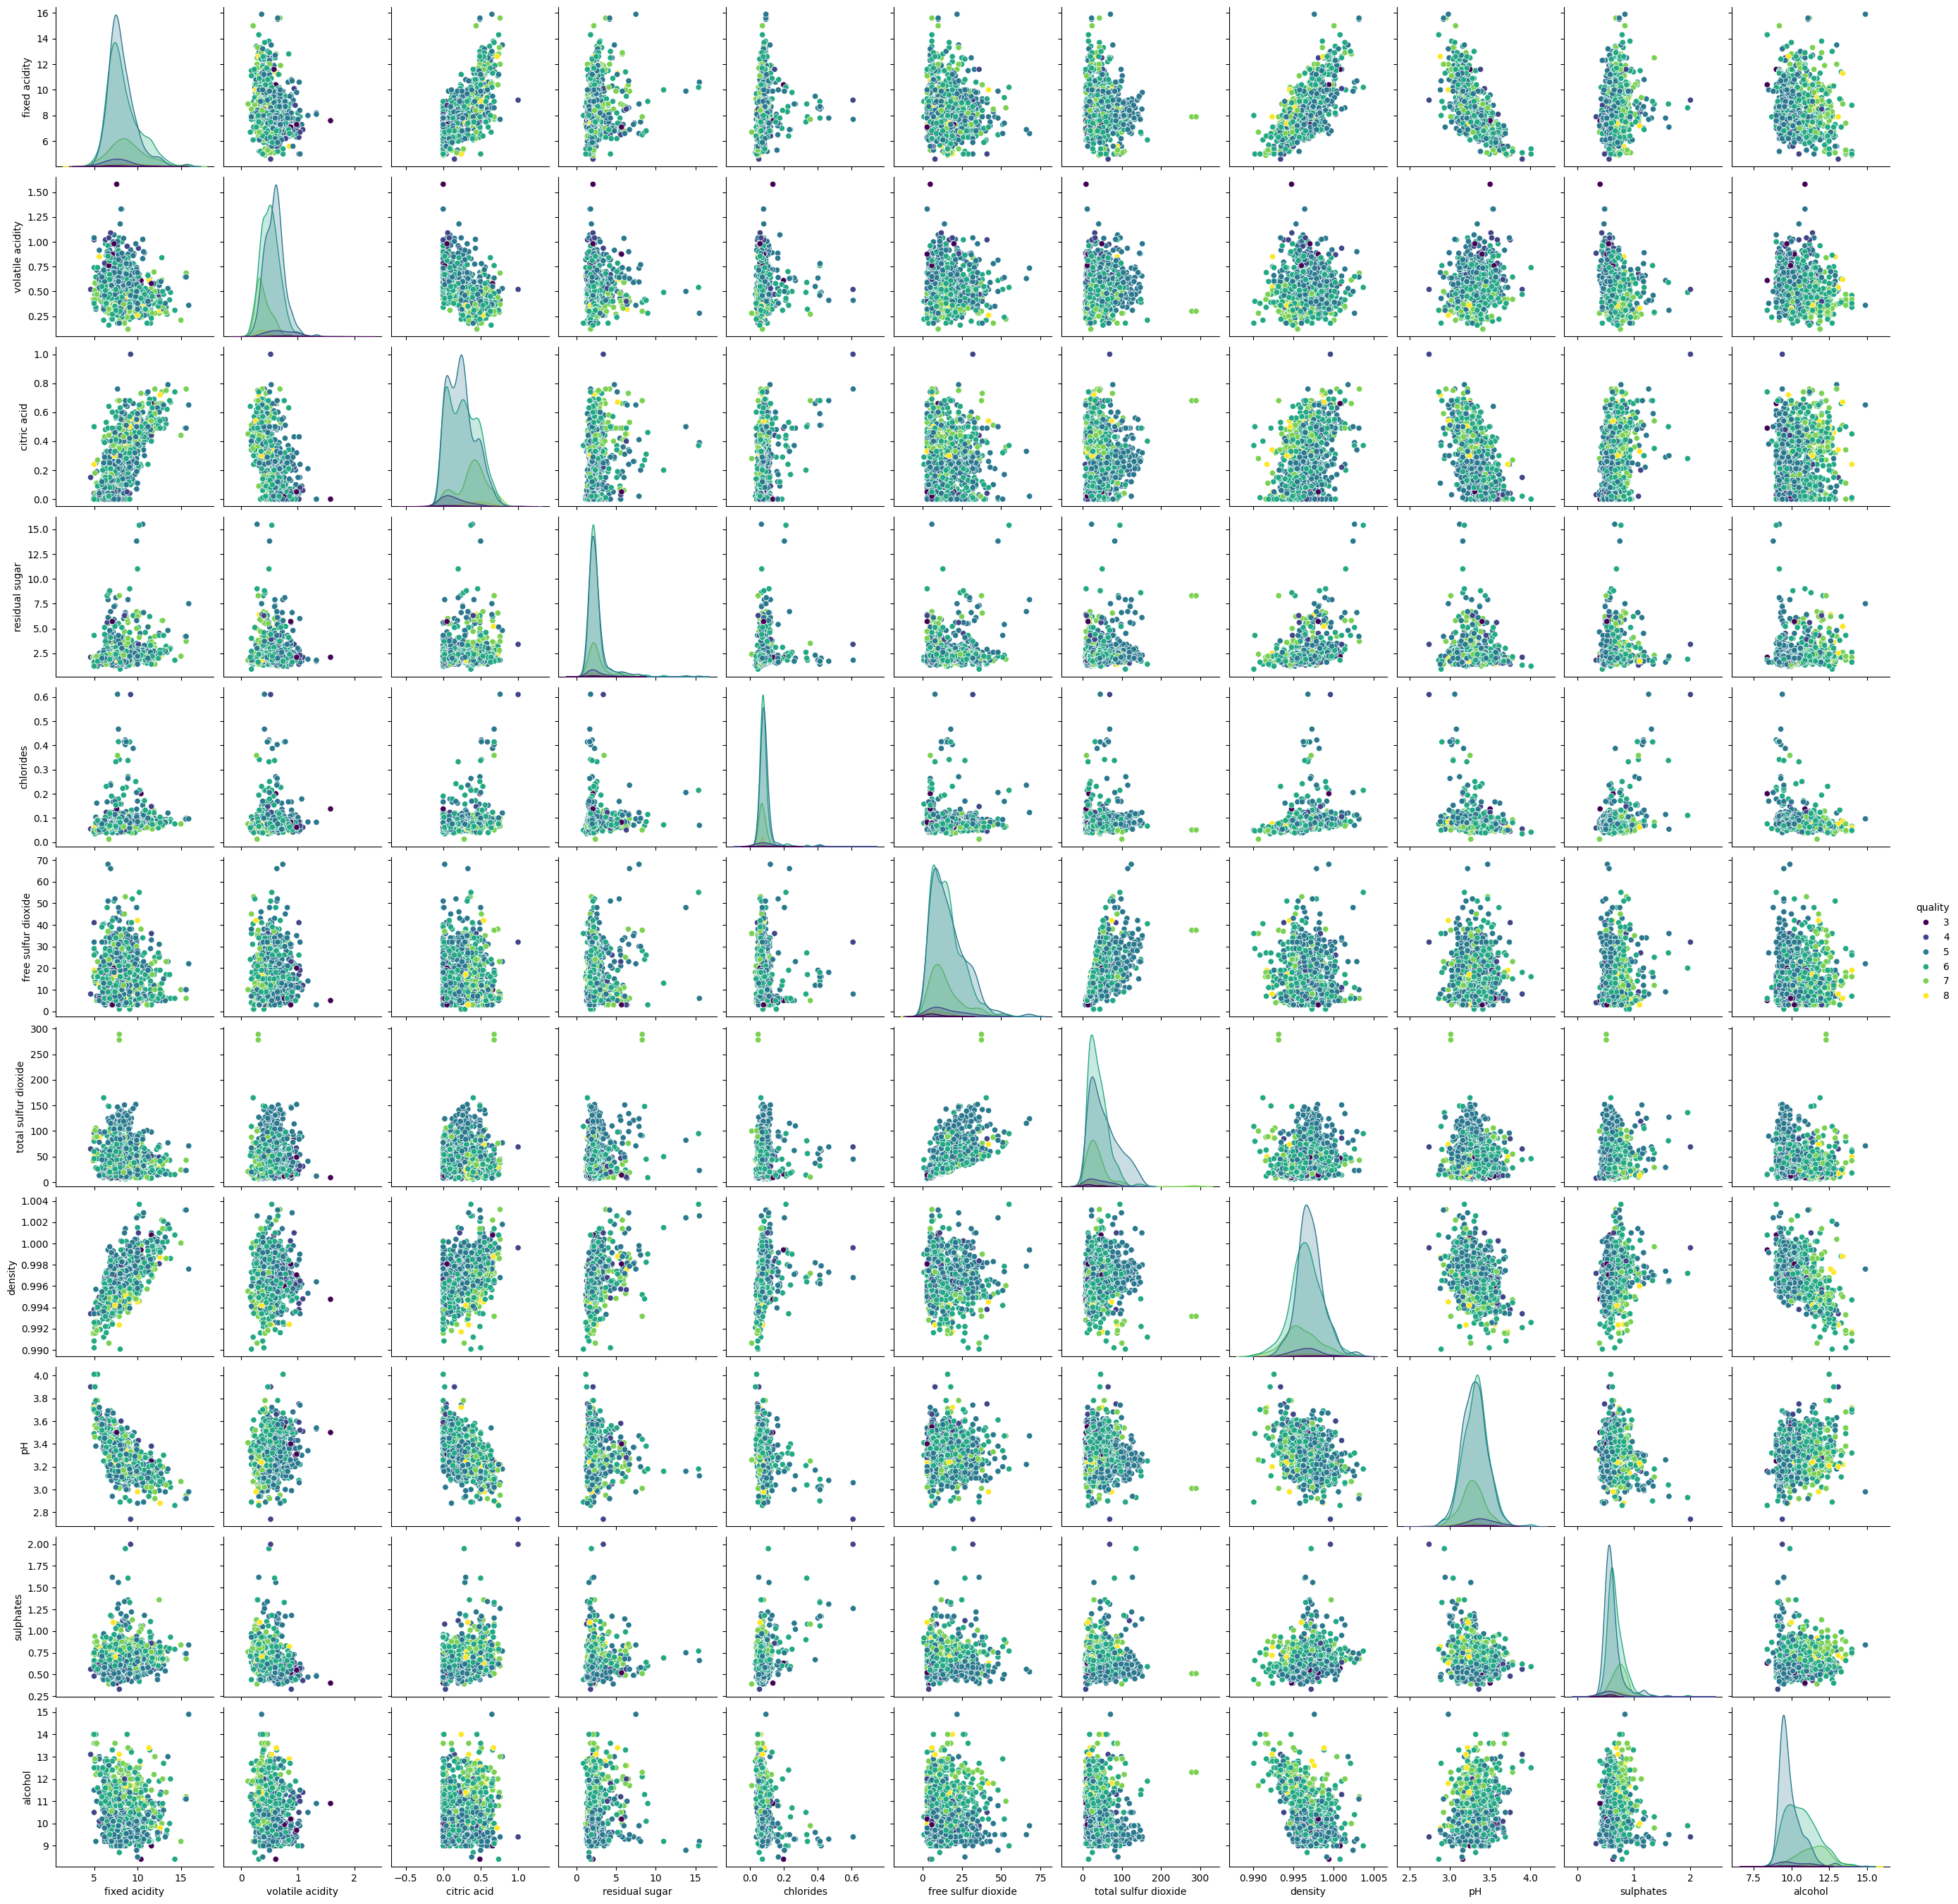

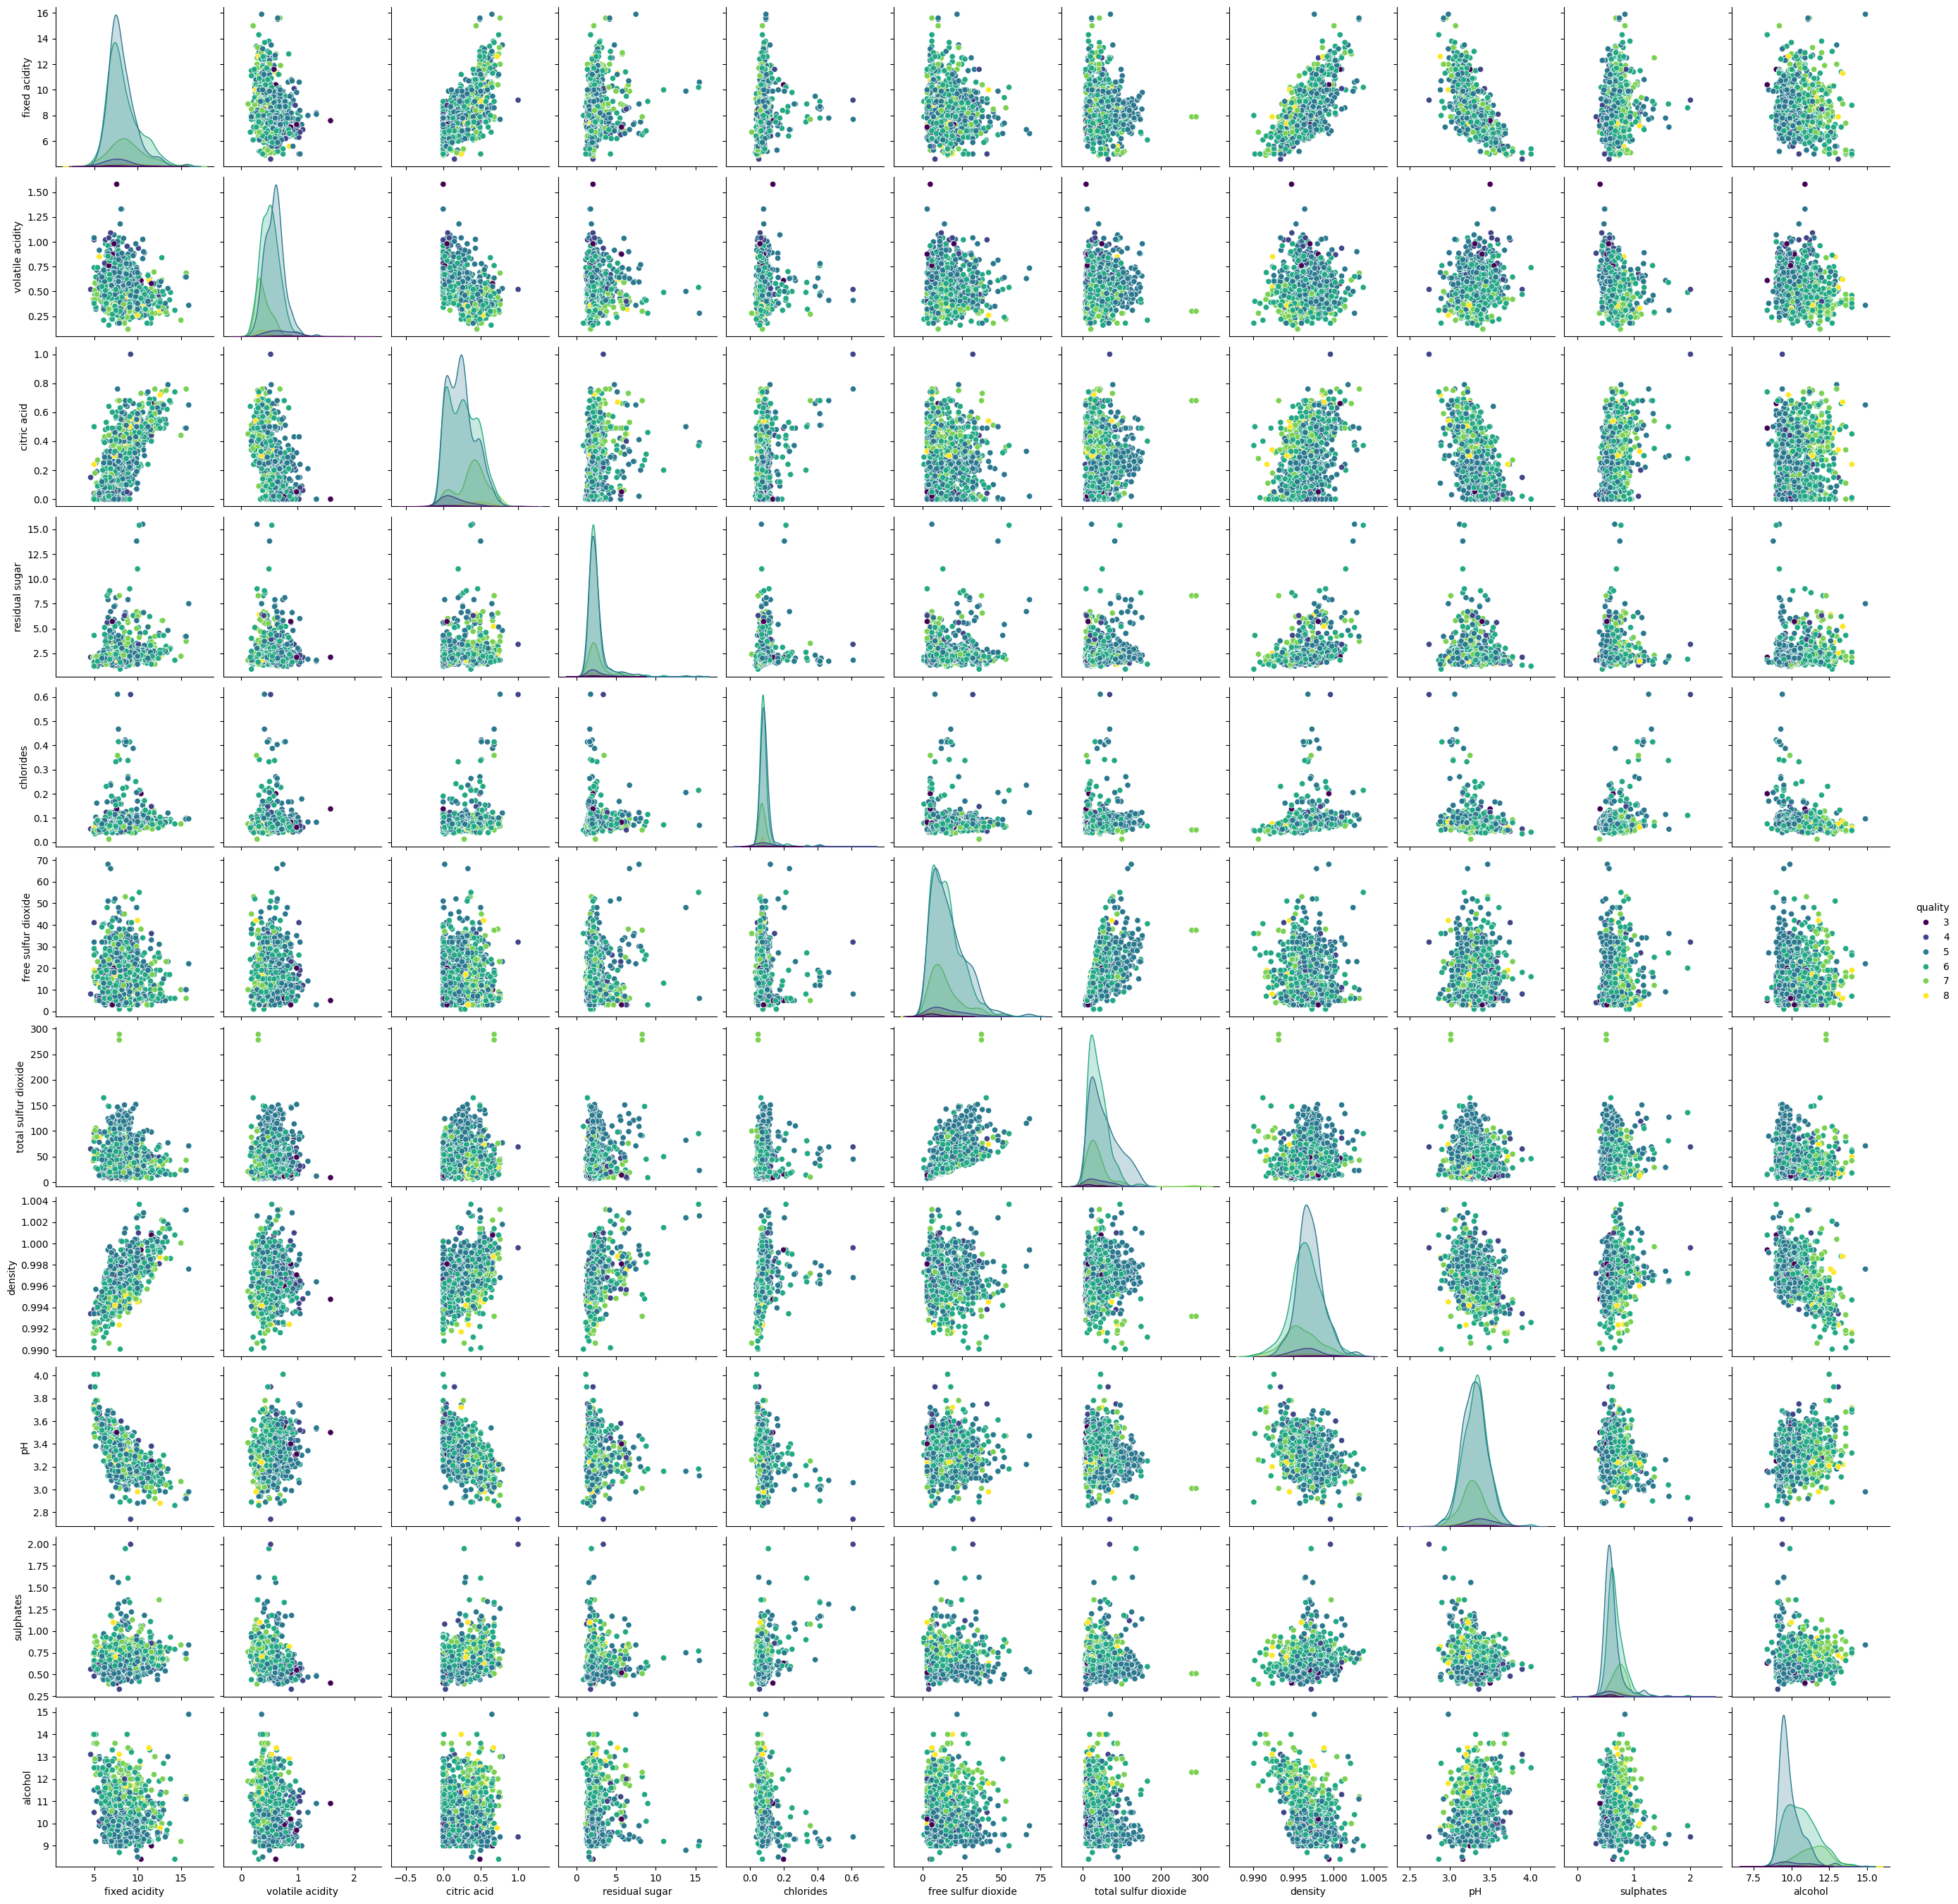

In [ ]:
# Pair plot to visualize relationships between features
sns.pairplot(df, hue='quality', palette='viridis')
plt.show()

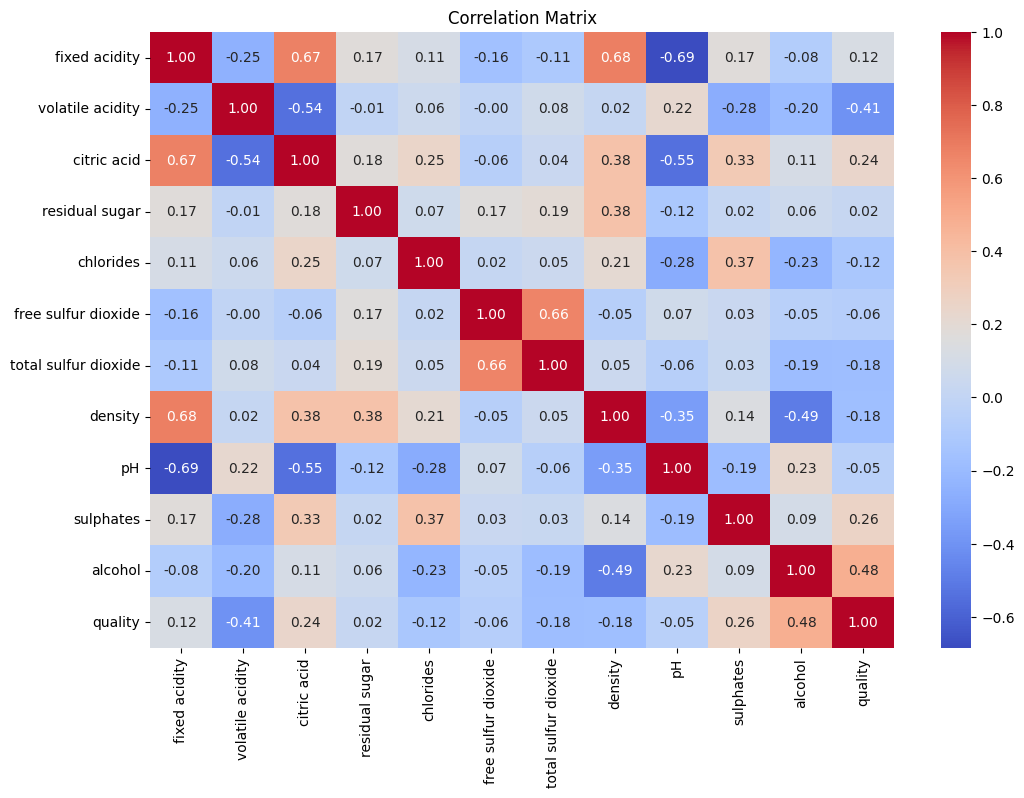

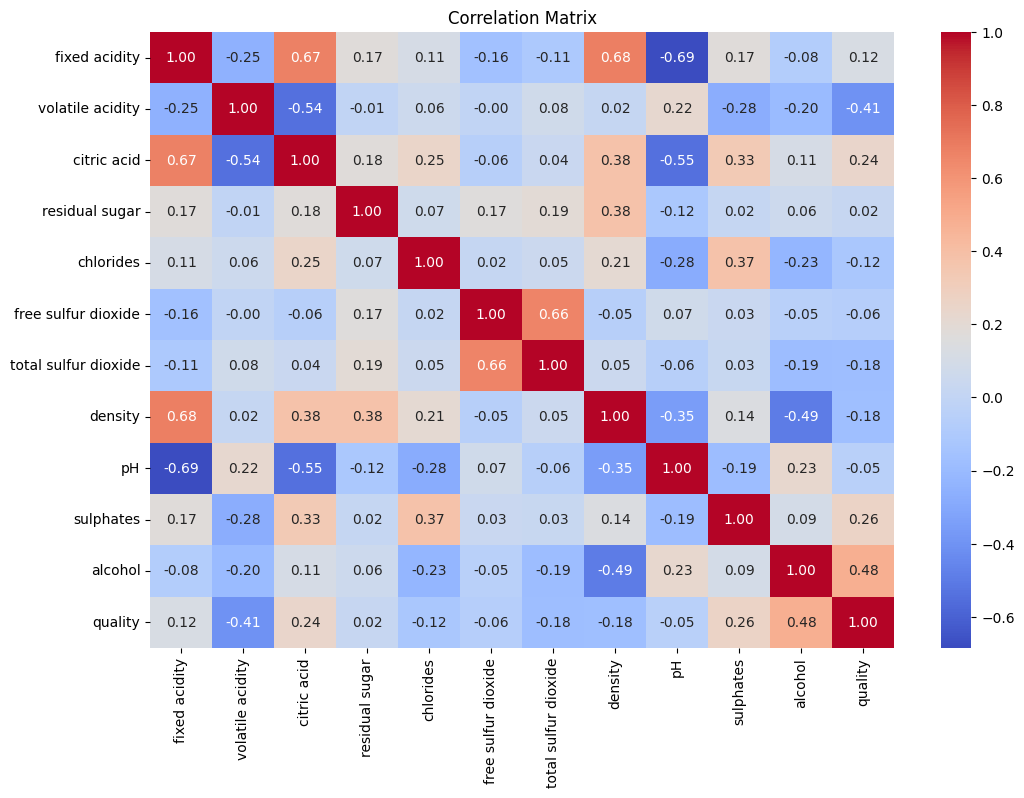

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

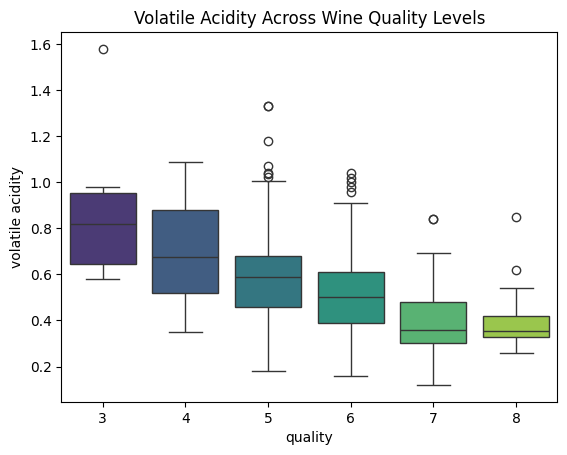

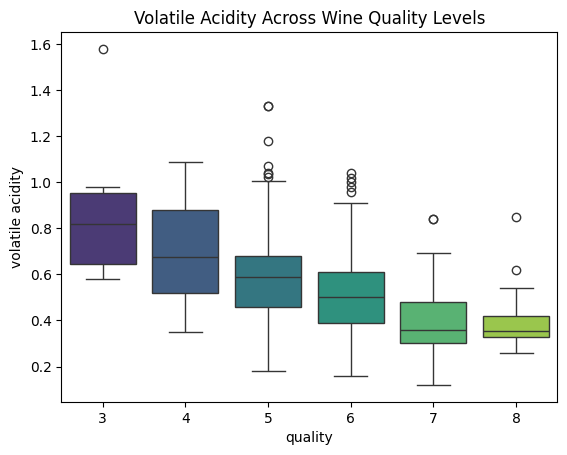

In [ ]:
# Box plot of volatile acidity across different wine quality levels
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='viridis')
plt.title('Volatile Acidity Across Wine Quality Levels')
plt.show()

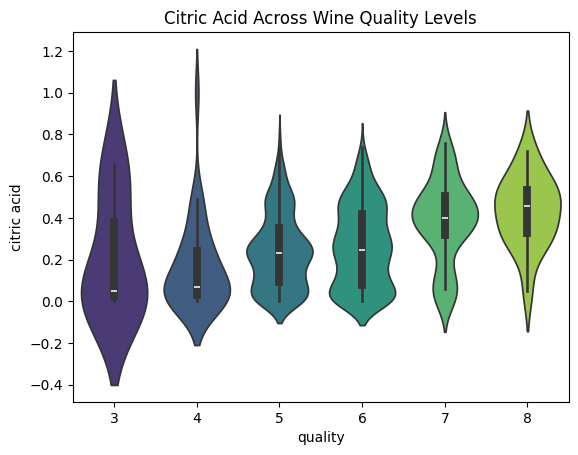

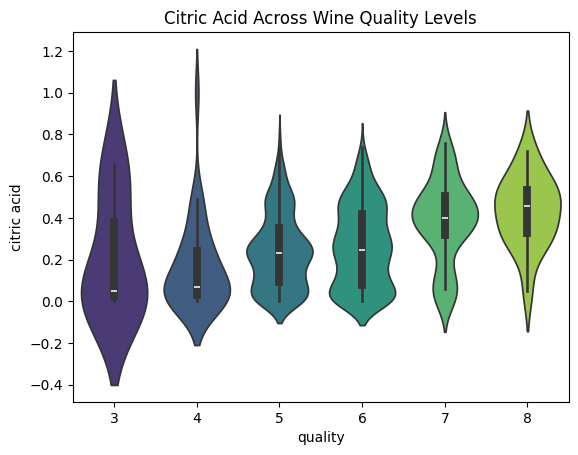

In [ ]:
# Violin plot for citric acid across wine quality levels
sns.violinplot(x='quality', y='citric acid', data=df, palette='viridis')
plt.title('Citric Acid Across Wine Quality Levels')
plt.show()

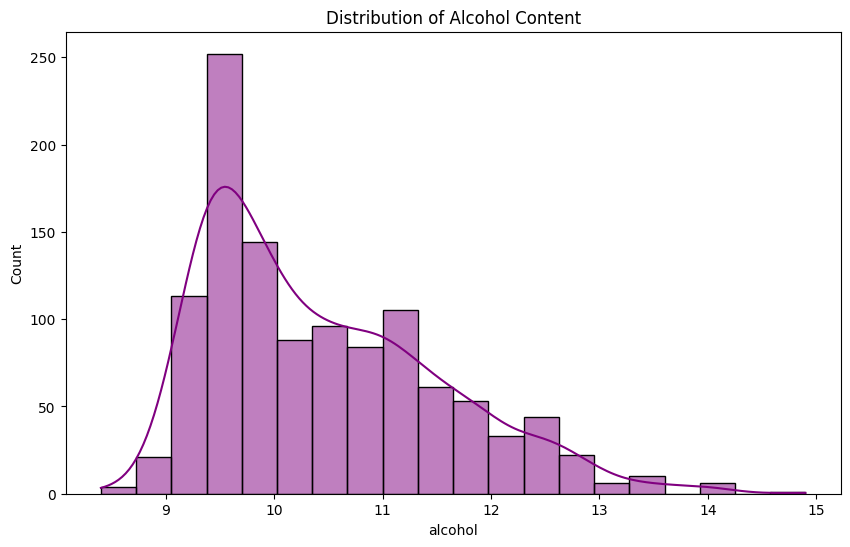

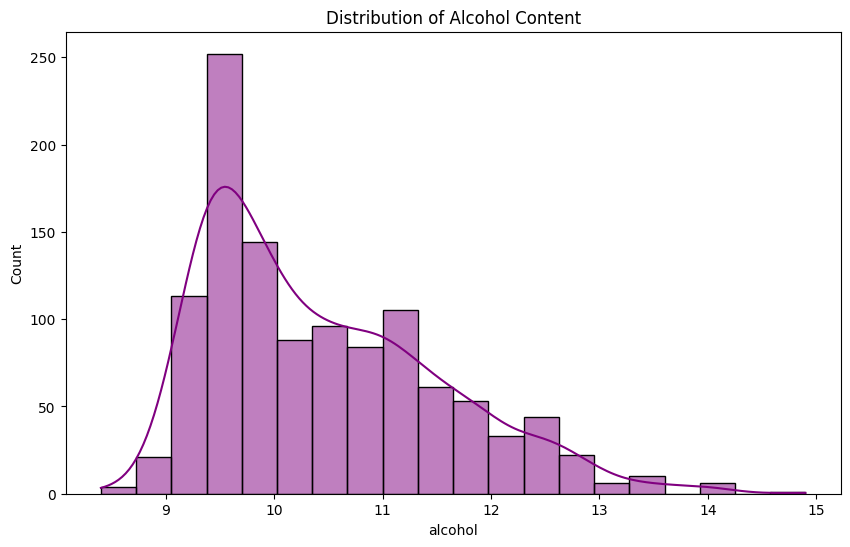

In [ ]:
# Histogram of alcohol content
plt.figure(figsize=(10, 6))
sns.histplot(df['alcohol'], bins=20, kde=True, color='purple')
plt.title('Distribution of Alcohol Content')
plt.show()